# 0. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [194]:
corp_time_df = pd.read_csv("Corp Ownership and Occupancy Over Time.csv")
zip_neighbor_df = pd.read_csv("Boston_Neighborhoods_Zipcodes.csv")
census_corp_time_df = pd.read_csv("Census + Corp Ownership and Occupancy Over Time.csv")

In [37]:
(corp_time_df.equals(census_corp_time_df[['Neighborhood', 'Year', 'own_occ_rate', 'corp_own_rate']]), 
 census_corp_time_df[['Neighborhood', 'Year', 'own_occ_rate', 'corp_own_rate']].equals(corp_time_df))

(True, True)

In [6]:
census_corp_time_df.head()

,Neighborhood,Year,own_occ_rate,corp_own_rate,college,tot_pop_18plus,two_or_more_0_17,aapi_0_17,tot_pop_all,other_18plus,...,tot_pop_0_17,aian_all,tot_gq_pop,occ_unit,aapi_18plus,juvenile,other_all,hisp_all,black_18plus,objectid
0,Allston,2004,0.29,0.07,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
1,Allston,2005,0.30,0.07,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
2,Allston,2006,0.29,0.08,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
3,Allston,2007,0.31,0.08,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
4,Allston,2008,0.31,0.09,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1


In [7]:
corp_time_df.head()

,Neighborhood,Year,own_occ_rate,corp_own_rate
0,Allston,2004,0.29,0.07
1,Allston,2005,0.30,0.07
2,Allston,2006,0.29,0.08
3,Allston,2007,0.31,0.08
4,Allston,2008,0.31,0.09


In [38]:
([hood for hood in census_corp_time_df['Neighborhood'].unique() if hood not in set(zip_neighbor_df['Neighborhood'])],
 [hood for hood in corp_time_df['Neighborhood'].unique() if hood not in set(zip_neighbor_df['Neighborhood'])])

(['Fenway', 'North End', 'West End'], ['Fenway', 'North End', 'West End'])

In [39]:
# Add missing neighborhoods
add_missing_df = pd.DataFrame([(2215, "Fenway"), (2113, "North End"), (2113, "West End")], 
                              columns=['Zip Code', 'Neighborhood'])
full_zip_neighbor_df = pd.concat([zip_neighbor_df, add_missing_df]).reset_index(drop=True)
full_zip_neighbor_df.to_csv("full_zip_map.csv", index=None)

In [49]:
census_corp_time_df['Neighborhood'].unique()

array(['Allston', 'Beacon Hill', 'Brighton', 'Downtown', 'Charlestown',
       'Chinatown', 'Dorchester', 'East Boston', 'Fenway', 'Hyde Park',
       'Jamaica Plain', 'Longwood', 'Mattapan', 'North End', 'Roslindale',
       'Roxbury', 'South Boston', 'South Boston Waterfront', 'South End',
       'West End', 'West Roxbury'], dtype=object)

In [260]:
full_zip_neighbor_df[full_zip_neighbor_df['Zip Code']==2215]

,Zip Code,Neighborhood
10,2215,Downtown
35,2215,Fenway


In [259]:
census_corp_time_df

,Neighborhood,Year,own_occ_rate,corp_own_rate,college,tot_pop_18plus,two_or_more_0_17,aapi_0_17,tot_pop_all,other_18plus,...,aapi_18plus,juvenile,other_all,hisp_all,black_18plus,objectid,delta_own_occ_rate,delta_corp_own_rate,total_delta_own_occ_rate,total_delta_corp_own_rate
0,Allston,2004,0.29,0.07,3214,26668,179,353,28621,273,...,6820,0,330,3657,1294,1,NaN,NaN,NaN,NaN
1,Allston,2005,0.30,0.07,3214,26668,179,353,28621,273,...,6820,0,330,3657,1294,1,0.01,0.00,NaN,NaN
2,Allston,2006,0.29,0.08,3214,26668,179,353,28621,273,...,6820,0,330,3657,1294,1,-0.01,0.01,NaN,NaN
3,Allston,2007,0.31,0.08,3214,26668,179,353,28621,273,...,6820,0,330,3657,1294,1,0.02,0.00,NaN,NaN
4,Allston,2008,0.31,0.09,3214,26668,179,353,28621,273,...,6820,0,330,3657,1294,1,0.00,0.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,West Roxbury,2020,0.66,0.07,0,25457,412,450,31561,157,...,2001,0,220,3567,2399,24,0.00,0.02,NaN,NaN
437,West Roxbury,2021,0.66,0.09,0,25457,412,450,31561,157,...,2001,0,220,3567,2399,24,0.00,0.02,NaN,NaN
438,West Roxbury,2022,0.67,0.09,0,25457,412,450,31561,157,...,2001,0,220,3567,2399,24,0.01,0.00,NaN,NaN
439,West Roxbury,2023,0.66,0.11,0,25457,412,450,31561,157,...,2001,0,220,3567,2399,24,-0.01,0.02,NaN,NaN


<AxesSubplot:>

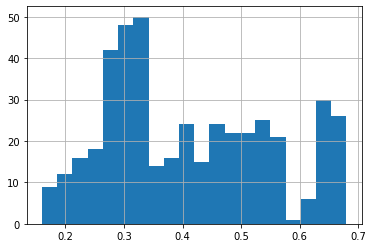

In [58]:
census_corp_time_df['own_occ_rate'].hist(bins=20)

<AxesSubplot:>

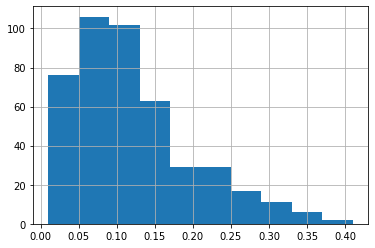

In [59]:
census_corp_time_df['corp_own_rate'].hist()

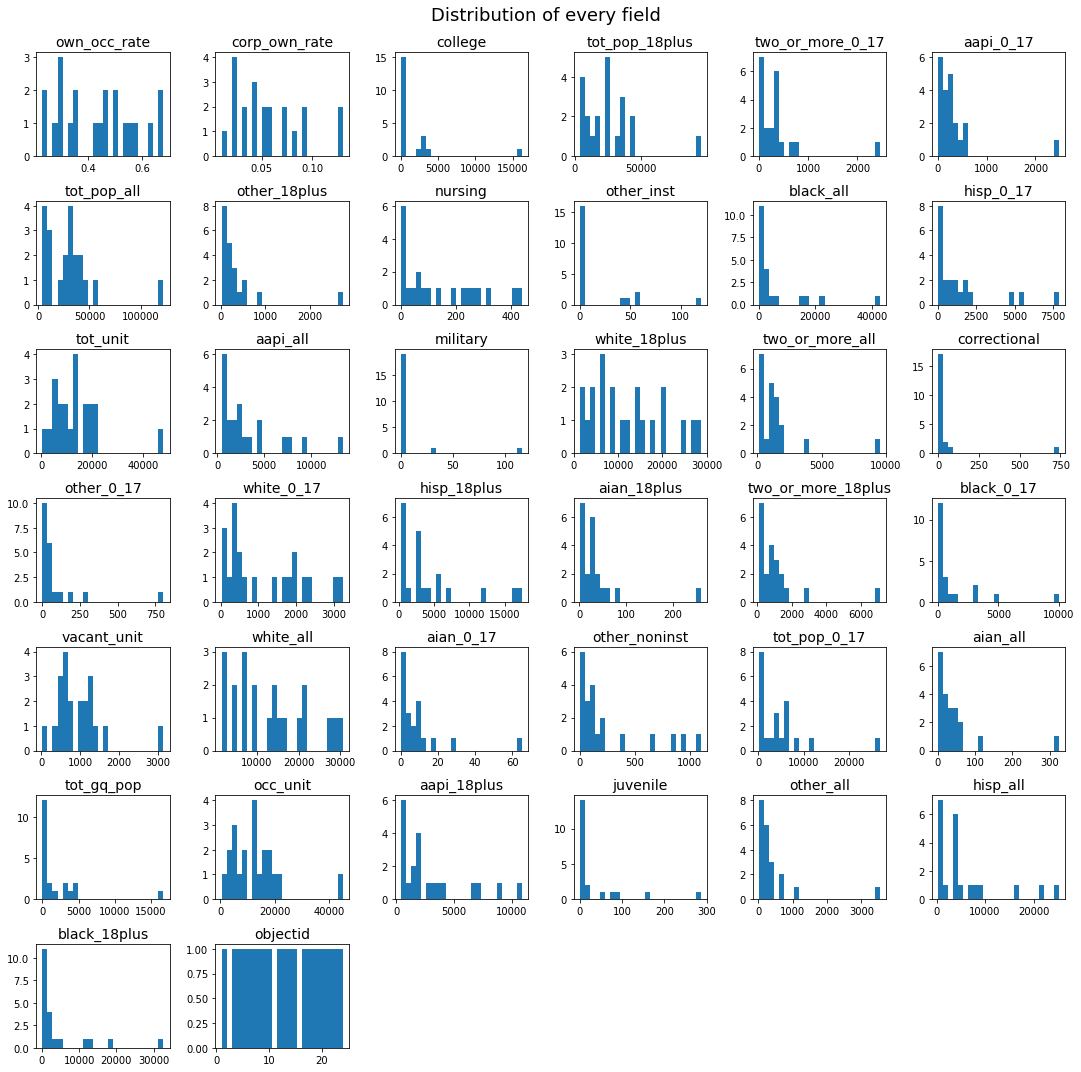

In [209]:
f, ax = plt.subplots(7, 6, figsize=(15,15))
ax_idx = 0
ax = ax.ravel()
for col in census_corp_time_df.columns:
    if col in ['Neighborhood', 'Year']:
        continue
    census_corp_time_df.drop_duplicates(subset=['Neighborhood'])[col].hist(ax=ax[ax_idx], bins=24)
    ax[ax_idx].grid(visible=False)
    ax[ax_idx].set_title(col, size=14)
    ax_idx += 1
for idx in range(ax_idx, 7*6):
    ax[idx].remove()
f.suptitle("Distribution of every field", size=18, y=0.99)
f.tight_layout()
f.savefig("figures/field_distributions.pdf")
f.savefig("figures/field_distributions.jpeg")

In [193]:
census_corp_time_df[census_corp_time_df['juvenile']>0]['Neighborhood'].unique()

array(['Brighton', 'Dorchester', 'East Boston', 'Jamaica Plain',
       'Mattapan', 'Roslindale', 'Roxbury', 'South Boston'], dtype=object)

In [188]:
census_corp_time_df[census_corp_time_df['black_all']>40000]['Neighborhood'].unique()

array(['Dorchester'], dtype=object)

In [200]:
census_corp_time_df[census_corp_time_df['Neighborhood']=='Allston'].iloc[:, 4:].nunique(axis=0) == 1

college               True
tot_pop_18plus        True
two_or_more_0_17      True
aapi_0_17             True
tot_pop_all           True
other_18plus          True
nursing               True
other_inst            True
black_all             True
hisp_0_17             True
tot_unit              True
aapi_all              True
military              True
white_18plus          True
two_or_more_all       True
correctional          True
other_0_17            True
white_0_17            True
hisp_18plus           True
aian_18plus           True
two_or_more_18plus    True
black_0_17            True
vacant_unit           True
white_all             True
aian_0_17             True
other_noninst         True
tot_pop_0_17          True
aian_all              True
tot_gq_pop            True
occ_unit              True
aapi_18plus           True
juvenile              True
other_all             True
hisp_all              True
black_18plus          True
objectid              True
dtype: bool

In [202]:
census_corp_time_df.groupby(['Neighborhood']).apply(lambda x: (x.iloc[:, 4:].nunique(axis=0) == 1).all())

Neighborhood
Allston                    True
Beacon Hill                True
Brighton                   True
Charlestown                True
Chinatown                  True
Dorchester                 True
Downtown                   True
East Boston                True
Fenway                     True
Hyde Park                  True
Jamaica Plain              True
Longwood                   True
Mattapan                   True
North End                  True
Roslindale                 True
Roxbury                    True
South Boston               True
South Boston Waterfront    True
South End                  True
West End                   True
West Roxbury               True
dtype: bool

In [191]:
census_corp_time_df[census_corp_time_df['college']>10000]

,Neighborhood,Year,own_occ_rate,corp_own_rate,college,tot_pop_18plus,two_or_more_0_17,aapi_0_17,tot_pop_all,other_18plus,...,tot_pop_0_17,aian_all,tot_gq_pop,occ_unit,aapi_18plus,juvenile,other_all,hisp_all,black_18plus,objectid
168,Fenway,2004,0.23,0.09,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
169,Fenway,2005,0.24,0.13,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
170,Fenway,2006,0.23,0.13,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
171,Fenway,2007,0.24,0.13,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
172,Fenway,2008,0.23,0.15,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
173,Fenway,2009,0.23,0.15,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
174,Fenway,2010,0.23,0.16,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
175,Fenway,2011,0.22,0.16,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
176,Fenway,2012,0.21,0.15,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
177,Fenway,2013,0.21,0.16,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10


In [103]:
census_corp_time_df.groupby(['objectid']).apply(lambda x: x['Neighborhood'].unique()).explode().sort_values()

objectid
1                     Allston
3                 Beacon Hill
4                    Brighton
5                 Charlestown
6                   Chinatown
7                  Dorchester
8                    Downtown
9                 East Boston
10                     Fenway
12                  Hyde Park
13              Jamaica Plain
14                   Longwood
15                   Mattapan
17                  North End
18                 Roslindale
19                    Roxbury
20               South Boston
21    South Boston Waterfront
22                  South End
23                   West End
24               West Roxbury
dtype: object

In [205]:
census_corp_time_df.columns

Index(['Neighborhood', 'Year', 'own_occ_rate', 'corp_own_rate', 'college',
       'tot_pop_18plus', 'two_or_more_0_17', 'aapi_0_17', 'tot_pop_all',
       'other_18plus', 'nursing', 'other_inst', 'black_all', 'hisp_0_17',
       'tot_unit', 'aapi_all', 'military', 'white_18plus', 'two_or_more_all',
       'correctional', 'other_0_17', 'white_0_17', 'hisp_18plus',
       'aian_18plus', 'two_or_more_18plus', 'black_0_17', 'vacant_unit',
       'white_all', 'aian_0_17', 'other_noninst', 'tot_pop_0_17', 'aian_all',
       'tot_gq_pop', 'occ_unit', 'aapi_18plus', 'juvenile', 'other_all',
       'hisp_all', 'black_18plus', 'objectid'],
      dtype='object')

In [ ]:
census_corp_time_df['perc_black'] = census_corp_time_df

In [120]:
census_corp_time_df[census_corp_time_df['college']==0]

,Neighborhood,Year,own_occ_rate,corp_own_rate,college,tot_pop_18plus,two_or_more_0_17,aapi_0_17,tot_pop_all,other_18plus,...,tot_pop_0_17,aian_all,tot_gq_pop,occ_unit,aapi_18plus,juvenile,other_all,hisp_all,black_18plus,objectid
21,Beacon Hill,2004,0.34,0.05,0,8603,91,15,9336,43,...,733,1,33,5485,615,0,46,537,231,3
22,Beacon Hill,2005,0.34,0.06,0,8603,91,15,9336,43,...,733,1,33,5485,615,0,46,537,231,3
23,Beacon Hill,2006,0.32,0.06,0,8603,91,15,9336,43,...,733,1,33,5485,615,0,46,537,231,3
24,Beacon Hill,2007,0.33,0.07,0,8603,91,15,9336,43,...,733,1,33,5485,615,0,46,537,231,3
25,Beacon Hill,2008,0.33,0.07,0,8603,91,15,9336,43,...,733,1,33,5485,615,0,46,537,231,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,West Roxbury,2020,0.66,0.07,0,25457,412,450,31561,157,...,6104,26,505,13390,2001,0,220,3567,2399,24
437,West Roxbury,2021,0.66,0.09,0,25457,412,450,31561,157,...,6104,26,505,13390,2001,0,220,3567,2399,24
438,West Roxbury,2022,0.67,0.09,0,25457,412,450,31561,157,...,6104,26,505,13390,2001,0,220,3567,2399,24
439,West Roxbury,2023,0.66,0.11,0,25457,412,450,31561,157,...,6104,26,505,13390,2001,0,220,3567,2399,24


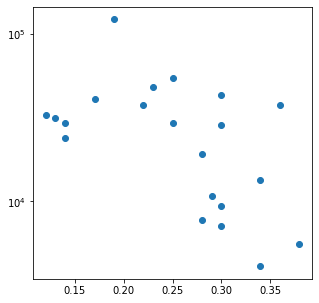

In [204]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(census_corp_time_df[census_corp_time_df['Year']==2024]['corp_own_rate'],
           census_corp_time_df[census_corp_time_df['Year']==2024]['tot_pop_all'])
ax.set_yscale("symlog")

In [210]:
census_corp_time_df

,Neighborhood,Year,own_occ_rate,corp_own_rate,college,tot_pop_18plus,two_or_more_0_17,aapi_0_17,tot_pop_all,other_18plus,...,tot_pop_0_17,aian_all,tot_gq_pop,occ_unit,aapi_18plus,juvenile,other_all,hisp_all,black_18plus,objectid
0,Allston,2004,0.29,0.07,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
1,Allston,2005,0.30,0.07,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
2,Allston,2006,0.29,0.08,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
3,Allston,2007,0.31,0.08,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
4,Allston,2008,0.31,0.09,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,West Roxbury,2020,0.66,0.07,0,25457,412,450,31561,157,...,6104,26,505,13390,2001,0,220,3567,2399,24
437,West Roxbury,2021,0.66,0.09,0,25457,412,450,31561,157,...,6104,26,505,13390,2001,0,220,3567,2399,24
438,West Roxbury,2022,0.67,0.09,0,25457,412,450,31561,157,...,6104,26,505,13390,2001,0,220,3567,2399,24
439,West Roxbury,2023,0.66,0.11,0,25457,412,450,31561,157,...,6104,26,505,13390,2001,0,220,3567,2399,24


In [213]:
census_corp_time_df[census_corp_time_df['Neighborhood']=='Allston']['own_occ_rate']

0     0.29
1     0.30
2     0.29
3     0.31
4     0.31
5     0.31
6     0.30
7     0.30
8     0.28
9     0.27
10    0.26
11    0.25
12    0.24
13    0.24
14    0.23
15    0.23
16    0.22
17    0.22
18    0.23
19    0.23
20    0.22
Name: own_occ_rate, dtype: float64

In [215]:
census_corp_time_df[census_corp_time_df['Neighborhood']=='Allston']['own_occ_rate'].iloc[1:]

1     0.30
2     0.29
3     0.31
4     0.31
5     0.31
6     0.30
7     0.30
8     0.28
9     0.27
10    0.26
11    0.25
12    0.24
13    0.24
14    0.23
15    0.23
16    0.22
17    0.22
18    0.23
19    0.23
20    0.22
Name: own_occ_rate, dtype: float64

In [218]:
census_corp_time_df[census_corp_time_df['Neighborhood']=='Brighton']['own_occ_rate'].iloc[:-1]

42    0.44
43    0.44
44    0.43
45    0.45
46    0.44
47    0.43
48    0.43
49    0.42
50    0.40
51    0.39
52    0.38
53    0.36
54    0.35
55    0.34
56    0.33
57    0.33
58    0.32
59    0.32
60    0.32
61    0.32
Name: own_occ_rate, dtype: float64

In [220]:
[np.nan] + list(census_corp_time_df[census_corp_time_df['Neighborhood']=='Allston']['own_occ_rate'].iloc[1:].values - 
 census_corp_time_df[census_corp_time_df['Neighborhood']=='Allston']['own_occ_rate'].iloc[:-1].values)
 

[nan,
 0.010000000000000009,
 -0.010000000000000009,
 0.020000000000000018,
 0.0,
 0.0,
 -0.010000000000000009,
 0.0,
 -0.019999999999999962,
 -0.010000000000000009,
 -0.010000000000000009,
 -0.010000000000000009,
 -0.010000000000000009,
 0.0,
 -0.009999999999999981,
 0.0,
 -0.010000000000000009,
 0.0,
 0.010000000000000009,
 0.0,
 -0.010000000000000009]

In [241]:
def get_delta(df, colname):
    df['delta_'+colname] = [np.nan] + list(df[colname].iloc[1:].values - df[colname].iloc[:-1].values)
    return df
census_corp_time_df = census_corp_time_df.groupby('Neighborhood', as_index=False).apply(
    lambda x: get_delta(x.sort_values('Year'), 'own_occ_rate')).reset_index(drop=True)
census_corp_time_df = census_corp_time_df.groupby('Neighborhood', as_index=False).apply(
    lambda x: get_delta(x.sort_values('Year'), 'corp_own_rate')).reset_index(drop=True)

In [248]:
census_corp_time_df['total_delta_own_occ_rate'] = census_corp_time_df.apply(
    lambda x: np.nan if x['Year']!=2024 else 
    x['own_occ_rate'] - census_corp_time_df[(census_corp_time_df['Neighborhood']==x['Neighborhood']) &
                                            (census_corp_time_df['Year']==2004)].iloc[0]['own_occ_rate'], 1)
census_corp_time_df['total_delta_corp_own_rate'] = census_corp_time_df.apply(
    lambda x: np.nan if x['Year']!=2024 else 
    x['corp_own_rate'] - census_corp_time_df[(census_corp_time_df['Neighborhood']==x['Neighborhood']) &
                                            (census_corp_time_df['Year']==2004)].iloc[0]['corp_own_rate'], 1)
census_corp_time_df.to_csv("census_corp_own_occ_time.csv")

In [250]:
census_corp_time_df['total_delta_corp_own_rate'].sort_values(ascending=False)

377    0.32
167    0.27
188    0.27
83     0.25
41     0.25
       ... 
435     NaN
436     NaN
437     NaN
438     NaN
439     NaN
Name: total_delta_corp_own_rate, Length: 441, dtype: float64